<a href="https://colab.research.google.com/github/MLJCUnito/ProjectX2020/blob/master/HowToTackleAMLCompetition/Lecture1%7CFeatureProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **How to Tackle a Machine Learning Competition**

## **Lecture 1: Feature Processing**

(Author: Simone Azeglio, simone.azeglio@edu.unito.it)

---
---

## **Overview**

* [Data Spectrometry](#section1)
    * [Macro, Meso, Micro-scale in Science](#section1.1)
    * [Scaling in Data Science](#section1.2)
    * [Preprocessing Data](#section1.3)
      * [Standardization](#section1.3.1)
      * [Scaling Features to a Range](#section1.3.2)
      * [Non-linear Transformations](#section1.3.3)
      * [Normalization](#section1.3.4)
      * [Encoding Categorical Features](#section1.3.5)

* [Feature Engineering](#section2)
    * [Feature Importance](#section2.0)
      * [Coefficients as Feature Importance](#section2.0.1)
      * [Decision Tree Feature Importance](#section2.0.2)
      * [Random Forest Feature Importance](#section2.0.3)
      * [XGBoost Feature Importance](#section2.0.4)
      * [Permutation Feature Importance](#section2.0.5)

    * [Feature Selection](#section2.1)
      * [Removing Features with Low Variance](#section2.1.0)
      * [Univariate Feature Selection](#section2.1.1)
      * [Recursive Feature Elimination](#section2.1.2)

    * [Feature Extraction (Bonus)](#section2.2)
      * [Loading Features from Dicts](#section2.2.1)
      * [Feature Hashing](#section2.2.2)
      
    * [Feature Construction](#section2.3)

* [Handling missing values](#section3)
  * [Univariate Feature Imputation](#section3.1)
  * [Multivariate Feature Imputation](#section3.2)
  * [Nearest Neighbors Imputation](#section3.3)

* [References & Additional Material](#section4)

---
---

<a id='section1'></a>
# **Data Spectrometry**
In this first part, we'd like to tell you about some practical tricks for making **gradient descent** work well, in particular, we're going to delve into feature scaling. As an introductory view, it seems reasonable to try to depict an intuition of the concept of *scale*. 

<a id='section1.1'></a>
## **Macro, Meso, Micro-scale in Science**

As scientists, we are well aware of the effects of using a specific measurement tool in order to characterize some quantity and describe reality. As an ideal example we consider the **length scale**. 

<img src="https://raw.githubusercontent.com/MLJCUnito/ProjectX2020/master/HowToTackleAMLCompetition/img/Lecture1/1.0.png" width="500" height="300">

We can identify three different points of view: *microscopic*, *mesoscopic* and *macroscopic*; which are intimately related to the adopted lenght scale. 

We usually deal with the *macroscopic scale* when the observer is in such a position (pretty far, in terms of distance), with respect to the object, that she/he can describe its global characteristics. Instead, we do refer to the *microscopic scale* when the observer is so close to the object that she/he can describe its atomistic details or elementary parts (e.g. molecules, atoms, quarks). Last but not least, we talk about *mesoscopic scale* everytime we are in between micro and macro. 

These definitions are deliberately vague, since delineating a precise and neat explanation would be higly difficult and complex, and it's actually far from our purposes. 

On the other side, this kind of introduction is quite useful, we should take a few minutes to think about the "active" role of the observer and about the fact that, to be honest, for every length scale, there's some specific theory, i.e. there's no global theory for a multi-scale description of some phenomenon. 

<a id='section1.2'></a>
## **Scaling in Data Science**

If our beloved observer (i.e. the scientist) has some kind of "privilege", i.e. choosing the right measurement tool, which is nothing but choosing the right scale in the description of some phenomenon, we can't really say the same for a data scientist. 

It's a sort of paradox, but a data scientist can't really deal with data retrieval most of the times. Because of that, a data scientist is often left alone in front of data, without even knowing from which measurement tool they're coming from. There's no way to interact with the length scale for example. 

Is there something that we can do about it? The only thing we can do is assuming that features are independent and scale these features in order to have something compatible from one to the other. This procedure is called **feature scaling**, and soon we'll understand why it is useful even for ML algorithms, such as gradient descent. 

<img src="https://raw.githubusercontent.com/MLJCUnito/ProjectX2020/master/HowToTackleAMLCompetition/img/Lecture1/1.1.png" width="500" height="300">

If you make sure that features are on similar scales, i.e. features take on similar range of values, then gradient descent can converge more quickly. 

More concretely, let's say we have a problem with two features where $x_1$ is the length of a football field and take values between $90$ (meters) and $115$ (meters) and $x_2$ is the radius of a ball which takes values between $10.5* 10^{-2}$ (meters) to $11.5* 10^{-2}$ (meters). If you plot the countours of the cost function $J(\omega)$ then you might get something similar to the *left plot*, and because of these very skewed elliptical shape, if we run gradient descent on this cost function, it may end up taking a long time and oscillating back and forth before reaching the global minimum. 

In these settings, as stated previously, a useful thing to do is to scale the features. Generally, the idea is to get every feature into approximately a $-1$ to $+1$ range. By doing this, we get the *right plot*. In this way, you can find a much more direct path to the global minimum rather than taking a much more convoluted path where you're sort of trying to follow a very complicated trajectory. 

<a id='section1.3'></a>
## **Preprocessing Data**

> In any Machine Learning process, Data Preprocessing is that step in which the data gets transformed, or *encoded*, to bring it to such a state that now the machine can easily parse it. In other words, the features of the data can now be easily interpreted by the algorithm.

We're going to dive into Scikit-Learn for this section and exploit its powerful *processing* package. 

We've been talking about scaling our data, now it's time to understand how to put our hands on code and try to do that. Usually, as previously stated, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers might be more appropriate. (Take a look at [Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py), you'll see the behaviors of the different scalers, transformers and normalizers with outliers). 

<a id='section1.3.1'></a>
### Standardization 

Many Machine Learning estimators require *standardization* of datasets, elseways they might behave badly because data are far from a Gaussian (with zero mean and unit variance) distribution. 

Most of the times, we ignore the shape of the distribution and just transform the data by subtracting the mean value of each feature, then scale by dividing features by their standard deviation. 

---

*Do you have in mind some models that assume that all features are centered around zero and have variance in the same order of magnitude? Can you think about possible issues related to the objective function in these cases?* 

<ins>Answer</ins>:  many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

---

There's a fast way to do that on a single array, by means of the *scale* function


In [2]:
from sklearn import preprocessing 
import numpy as np 

X_train = np.random.randint(5 , size = (3,3))
X_train

array([[2, 4, 4],
       [3, 4, 0],
       [4, 0, 0]])

In [3]:
X_scaled = preprocessing.scale(X_train)
X_scaled

array([[-1.22474487,  0.70710678,  1.41421356],
       [ 0.        ,  0.70710678, -0.70710678],
       [ 1.22474487, -1.41421356, -0.70710678]])

The *preprocessing* module provides a utility class [*StandardScaler*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) that compute the mean and std on a training set so as to be able to later reapply the same transform on the test set. 

(You should be well aware of what [*sklearn.pipeline.Pipeline*](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) is, it's crucial for strategies' deployment.)



In [4]:
scaler = preprocessing.StandardScaler().fit(X_train)
print(scaler.mean_)
print(scaler.scale_)
print(scaler.transform(X_train))

[3.         2.66666667 1.33333333]
[0.81649658 1.88561808 1.88561808]
[[-1.22474487  0.70710678  1.41421356]
 [ 0.          0.70710678 -0.70710678]
 [ 1.22474487 -1.41421356 -0.70710678]]


Now we can use the scaler instance on new data, to transform them in the same way we did previously.

In [ ]:
X_test = [[-1.,1., 0]]
scaler.transform(X_test)

array([[-3.53553391, -0.53452248, -1.41421356]])

It is possible to disable centering or scaling by passing *with_mean = False* or *with_std = False*. The first one might be particularly useful if applied to sparse CSR or CSC matrices to avoid breaking the sparsity structure of the data. 

<a id='section1.3.2'></a>
**<ins>Scaling Features to a Range</ins>**

Another standardization is scaling features to lie between a given minimum and maximum value, or so that the maximum absolute value of each future is scaled to unit size. This can be achieved with [*MinMaxScaler*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) or [*MaxAbsScaler*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler). 

Here you can see how to scale a toy data matrix to the $[0,1]$ range: 





In [18]:
X_train = np.random.randint(10, size = (3,3))
print(X_train)
min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_minmax = min_max_scaler.transform(X_train)
print(X_train_minmax)

[[0 6 5]
 [9 3 0]
 [3 6 3]]
[[0.         1.         1.        ]
 [1.         0.         0.        ]
 [0.33333333 1.         0.6       ]]


In the same way as above, the same instance of the transformer can be applied to some new test data: same scaling and shifting will be applied to be consistent. 

In [19]:
X_test = np.array([[3.,1.,4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax 

array([[ 0.33333333, -0.66666667,  0.8       ]])

It's pretty useful to let the scaler reveal some details about the transformation learned on the training data: 


In [20]:
print(min_max_scaler.scale_)

[0.11111111 0.33333333 0.2       ]


---

Can you retrieve the explicit formula for *MinMaxScaler*? 

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

---

*MaxAbsScaler* works in a similar fashion, the data will lie in the range $[-1,1]$. It is meant for data that is already centered at zero or sparse data. 

In [17]:
max_abs_scaler = preprocessing.MaxAbsScaler() ....

**<ins>Scaling Data with Outliers</ins>**

If our data contain many outliers, scaling using the mean and variance of the data is not likely to work well. In this case, we can use [*RobustScaler*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler).

This scaler removes the [median](https://en.wikipedia.org/wiki/Median) and scales data according to the [IQR](https://en.wikipedia.org/wiki/Interquartile_range) (InterQuartile Range). 

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set.

Unlike the previous scalers, the centering and scaling statistics of this scaler are based on percentiles and are therefore not influenced by a few number of very large marginal outliers. Consequently, the resulting range of the transformed feature values is larger than for the previous scalers and, more importantly, are approximately similar. Note that the outliers themselves are still present in the transformed data. If a separate outlier clipping is desirable, a non-linear transformation is required (see below).

In [23]:
X_train = [[1., -2., 2.],
           [-2., 1., 3.],
           [400., 1. , -2]]

transformer = preprocessing.RobustScaler().fit(X_train)
transformer.transform(X_train)

array([[ 0.        , -2.        ,  0.        ],
       [-0.01492537,  0.        ,  0.4       ],
       [ 1.98507463,  0.        , -1.6       ]])

In [24]:
min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)
min_max_scaler.transform(X_train)

array([[0.00746269, 0.        , 0.8       ],
       [0.        , 1.        , 1.        ],
       [1.        , 1.        , 0.        ]])

Median and interquartile range are then stored to be used on later data using the *transform* method.

<a id='section1.3.3'></a>
### Non-linear transformations

It's possible to generalize to non-linear transformations. We are going to talk about two types of transformations: *quantile transforms* and *power transforms*. The main take-home message is that we need *monotonic* transformations to preserve the rank of the values along each feature. 

Quantile transforms smooth out unusual distributions and are less influenced by outliers than scaling methods. In some way they distort correlations and distances within and across features. 

Power transforms are, indeed, a family of parametric transformations that aim to map data from any distribution to as close to a Gaussian distribution. 

**<ins>Mapping to a Uniform Distribution</ins>**

[*QuantileTransformer*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer) provides a non-parametric transformation to map the data to a uniform distribution with values between 0 and 1: 

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# load dataset
X,y = load_iris(return_X_y = True)
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
# Quantile transform 
quantile_transformer = preprocessing.QuantileTransformer(random_state = 0)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)

np.percentile(X_train[:, 0], [0,25,50,75,100])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


array([4.3, 5.1, 5.8, 6.5, 7.9])

This feature corresponds to the sepal length in cm. Once the quantile transform is applied, those landmarks approach closely the percentiles previously defined

In [26]:
np.percentile(X_train_trans[:, 0], [0, 25, 50, 75, 100])

array([0.        , 0.23873874, 0.50900901, 0.74324324, 1.        ])

Some more applications [here](https://machinelearningmastery.com/quantile-transforms-for-machine-learning/)

**<ins>Mapping to a Gaussian Distribution</ins>**

Many machine learning algorithms prefer or perform better when numerical input variables and even output variables in the case of regression have a Gaussian distribution. Power transforms are a family of parametric, monotonic transforms that aim to map data from any distribution to as close to a Gaussian distribution as possible, in order to stabilize variance and minimize skewness. 

[*PowerTransformer*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer) provides two transformations, the *Yeo-Johnson* transform: 

$\begin{split}x_i^{(\lambda)} =
\begin{cases}
 [(x_i + 1)^\lambda - 1] / \lambda & \text{if } \lambda \neq 0, x_i \geq 0, \\[8pt]
\ln{(x_i + 1)} & \text{if } \lambda = 0, x_i \geq 0 \\[8pt]
-[(-x_i + 1)^{2 - \lambda} - 1] / (2 - \lambda) & \text{if } \lambda \neq 2, x_i < 0, \\[8pt]
 - \ln (- x_i + 1) & \text{if } \lambda = 2, x_i < 0
\end{cases}\end{split}$


and the *Box-Cox* transform:

$\begin{split}x_i^{(\lambda)} =
\begin{cases}
\dfrac{x_i^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0, \\[8pt]
\ln{(x_i)} & \text{if } \lambda = 0,
\end{cases}\end{split}$

Box-Cox can only be applied to strictly positive data. In both methods, the transformation is parametrized by $\lambda$, which is determined trough maximum-likelihood estimation. Here an example of using Box-Cox to map samples drawn from a lognormal distribution to a normal distribution: 


In [29]:
pt = preprocessing.PowerTransformer(method = 'box-cox', standardize= False)
X_lognormal = np.random.RandomState(616).lognormal(size = (3,3))
print(X_lognormal)
pt.fit_transform(X_lognormal)

[[1.28331718 1.18092228 0.84160269]
 [0.94293279 1.60960836 0.3879099 ]
 [1.35235668 0.21715673 1.09977091]]


array([[ 0.49024349,  0.17881995, -0.1563781 ],
       [-0.05102892,  0.58863195, -0.57612415],
       [ 0.69420009, -0.84857822,  0.10051454]])

(Some more applications [here](https://machinelearningmastery.com/power-transforms-with-scikit-learn/))

Below some examples of the two transforms applied to various probability distributions, *any comment*? 

<img src="https://raw.githubusercontent.com/MLJCUnito/ProjectX2020/master/HowToTackleAMLCompetition/img/Lecture1/1.3.png" width="400" height="800">

<a id='section1.3.4'></a>
### Normalization

As scientists, we feel much more comfortable with Vector Space Models. *Normalization* is the process of scaling individual samples to have unit norm. This process might be useful if we plan to use a dot-product or some kernel to quantify similarities of pairs of samples.

The function [*normalize*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html#sklearn.preprocessing.normalize) provides a quick and easy way to perform this operation on a single array, using [L1 or L2 norms](https://medium.com/@montjoile/l0-norm-l1-norm-l2-norm-l-infinity-norm-7a7d18a4f40c): 



In [30]:
X = [[1., -1., 2. ],
     [2., 0., 0.],
     [0.1, 1., -1.]]
X_norm = preprocessing.normalize(X, norm = "l2")
X_norm

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.07053456,  0.70534562, -0.70534562]])

The *preprocessing* module provides a utility class *Normalizer* that implements the same operation using the *Transformer* API. This class is suitable for *sklearn.pipeline.Pipeline*

In [31]:
normalizer = preprocessing.Normalizer().fit(X) 
normalizer.transform(X)


array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.07053456,  0.70534562, -0.70534562]])

<a id='section1.3.5'></a>
### Encoding Categorical Features

In many cases, features are not continous values but categorical. E.g. a person could have some features: ``["from Italy", "from France", "from Germany"]``, ``["play sports", "doesn't play sports"]``, ``["uses Firefox", "uses Opera", "uses Chrome", "uses Safari", "uses Internet Explorer"]``. 

Such features can be efficiently coded as integers, for instance ``["from France", "play sports", "uses Chrome"]`` could be ``[1,0,2]``. 

To convert categorical features to such integer codes, we can use the [*OrdinalEncoder*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder). In this way, we transform each feature to one new feature of integers *(0* to *n_categories-1)*:

In [35]:
enc = preprocessing.OrdinalEncoder()
X = [["from Italy", "play sports", "uses Safari"], ["from Germany", "doesn't play sports", "uses Firefox"]]
enc.fit(X)

print(enc.transform([["from Germany", "doesn't play sports", "uses Firefox"]]))
print(enc.transform([["from Italy", "play sports", "uses Safari"]]))

print(enc.transform([["from Germany", "play sports", "uses Safari"]]))

[[0. 0. 0.]]
[[1. 1. 1.]]
[[0. 1. 1.]]


Some scikit-learn estimators expect continuous input, and would interpret categories as ordered, which is usually not desired. 

There's another way to convert categorical features to features that can be used with scikit-learn estimators: *one-hot encoding*. It can be obtained with the [*OneHotEncoder*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder), which transforms each categorical feature with ``n_categories``possible values into ``n_categories`` binary features, with one of them 1, and all others 0. 

Let's continue with the example above:


In [36]:
enc = preprocessing.OneHotEncoder()
X = [["from Italy", "play sports", "uses Safari"], ["from Germany", "doesn't play sports", "uses Firefox"]]
enc.fit(X)

print(enc.transform([["from Germany", "doesn't play sports", "uses Firefox"]]).toarray())
print(enc.transform([["from Italy", "play sports", "uses Safari"]]).toarray())

print(enc.transform([["from Germany", "play sports", "uses Safari"]]).toarray())

[[1. 0. 1. 0. 1. 0.]]
[[0. 1. 0. 1. 0. 1.]]
[[1. 0. 0. 1. 0. 1.]]


In [37]:
print(enc.transform([["from Germany", "play sports", "uses Safari"]]))

  (0, 0)	1.0
  (0, 3)	1.0
  (0, 5)	1.0


The values each feature can take is inferred automatically from the dataset and can be found in the ``categories_``attribute: 

In [38]:
enc.categories_

[array(['from Germany', 'from Italy'], dtype=object),
 array(["doesn't play sports", 'play sports'], dtype=object),
 array(['uses Firefox', 'uses Safari'], dtype=object)]


---
---

<a id='section2'></a>
# **Feature Engineering**

The real deal is that nobody explicitly tells you what **feature engineering** is, in some way, you are expected to understand for yourself what are good features.

<img src="https://raw.githubusercontent.com/MLJCUnito/ProjectX2020/master/HowToTackleAMLCompetition/img/Lecture1/1.2.jpg" width="800" height="250">

> Feature engineering is another topic which doesn’t seem to merit any review papers or books, or even chapters in books, but it is absolutely vital to ML success. […] Much of the success of machine learning is actually success in engineering features that a learner can understand. 

>*(Scott Locklin, in “Neglected machine learning ideas”)* 

Let's try to figure out what feature engineering is. 

In solving such problems, our goal is to get the best possible result from a model. In order to achieve that, we need to extract useful information and get the most from what we have. On one side, this includes getting the best possible result from the algorithms we are employing. On the other side, it also involves getting the most out of the available data. 

*How do we get the most out of our data for predictive modeling?* 

Feature engineering tries to find an answer to this question. 

> Actually, the success of all Machine Learning algorithms depends on how you present the data. 

> (*Mohammad Pezeshki, answer to “What are some general tips on feature selection and engineering that every data scientist should know?"*)



<a id='section2.0'></a>
## **Feature Importance**
Feature importance refers to a bunch of techniques that assign a score to input features based on how useful they are at predicting a target variable. These scores play an important role in predictive modeling, they usually provide useful insights into the dataset and the basis for dimensionality reduction and feature selection. 

Feature importance scores can be calculated both for regression and classification problems. 

These scores can be used in a range of situations, such as:
* *Better understanding the data*: the relative scorse can highlight which features may be most relevant to the target, and on the other side, which are least relevant. This could be a useful notion for a domain expert and could be used as a basis for gathering more or different data. 


* *Better understanding a model*: inspecting the importance score provides insights into the specific model we're using and which features are the most important to the model when elaborating a prediction. 


* *Reducing the number of input features*: we can use the importance scores to select those features to delete (lowest score) and those to keep (highest scores). 

Now let's jot down a few lines of code in order to grasp this topic in a better way.In order to explore feature importance scores, we'll import a few test datasets directly from sklearn. 






**<ins>Classification Dataset</ins>**

Easy peasy, we can use the [*make_classification()*](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function to create a test binary classification dataset. 

We can specify the number of samples and the number of features, some of them are going to be informative and the remaining redundant. (*Tip*: you should fix the *random seed*, in this way you'll get a reproducible result)


In [2]:
from sklearn.datasets import make_classification

X_clf, y_clf = make_classification(n_samples = 1000, n_features = 8, n_informative = 3, n_redundant = 5, random_state = 1)

print(X_clf.shape, y_clf.shape)

(1000, 8) (1000,)


**<ins>Regression Dataset</ins>**

In a parallel fashion, we'll use the [*make_regression()*](https://machinelearningmastery.com/calculate-feature-importance-with-python/#:~:text=Feature%20importance%20refers%20to%20techniques,at%20predicting%20a%20target%20variable.) function to create a regression dataset. 

In [4]:
from sklearn.datasets import make_regression

X_reg, y_reg = make_regression(n_samples = 1000, n_features = 8, n_informative = 3, random_state = 1)

print(X_reg.shape, y_reg.shape)

(1000, 8) (1000,)


<a id='section2.0.1'></a>
### Coefficients as Feature Importance 

When we think about linear machine learning algorithms, we always fit a model where the prediction is the weighted sum of the input values (e.g. linear regression, logistic regression, ridge regression etc..) 

These coefficients can be used directly as naive feature importance scores. Firstly we'll fit a model on the dataset to find the coefficients, then summarize the importance scores for each input feature and create a bar chart to get an idea of the relative importance. 

**<ins>Linear Regression Feature Importance</ins>**

It's time to fit a [*LinearRegression()*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model on the regression dataset and get the *coef_* property that conatins the coefficients. The only assumption is that the input variables have the same scale or have been scaled prior to fitting the model. 

This same approach can be used with regularized linear models, such as Ridge and ElasticNet. 


Feature: 0, Score: -0.00000
Feature: 1, Score: 41.28219
Feature: 2, Score: 0.00000
Feature: 3, Score: 41.81266
Feature: 4, Score: 45.15258
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000


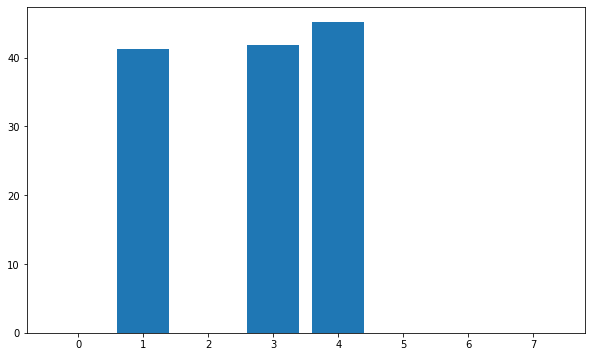

In [5]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

model = LinearRegression()
model.fit(X_reg, y_reg)

importance = model.coef_

for i,v in enumerate(importance):
	print("Feature: %0d, Score: %.5f" %(i,v))
 

plt.figure(figsize = (10,6))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**<ins>Logistic Regression Feature Importance</ins>**

In a similar fashion, we can do the same to fit a [*LogisticRegression()*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model. 

Feature: 0, Score: -1.08328
Feature: 1, Score: 0.35669
Feature: 2, Score: -0.13472
Feature: 3, Score: 0.58331
Feature: 4, Score: -0.40560
Feature: 5, Score: -0.38912
Feature: 6, Score: 0.31175
Feature: 7, Score: -0.88263


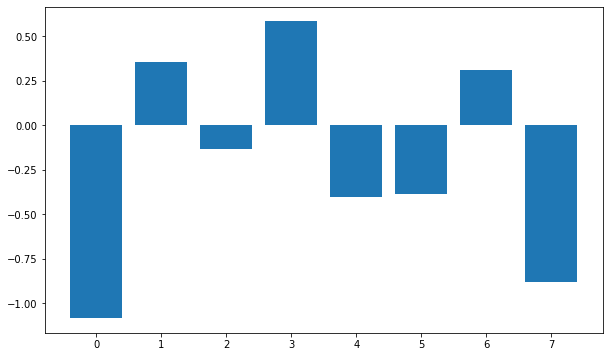

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_clf, y_clf)

importance = model.coef_[0]

for i,v in enumerate(importance):
	print("Feature: %0d, Score: %.5f" %(i,v))
 

plt.figure(figsize = (10,6))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Recall that this is a classification problem with classes 0 and 1 (binary). Notice that the coefficients are both positive and negative, positive scores indicate a feature that predicts class 1 while negative scores indicate a feature that predicts class 0. 

*Why can't we analyze a regression problem with Logistic Regression?* (A pretty naive question, try to answer tho)

<a id='section2.0.2'></a>
### Decision Tree Feature Importance

Decision Tree algorithms like **C**lassification **A**nd **R**egression **T**rees (**CART**) offer importance scores based on the reduction in the criterion used to select split points, like Gini or Entropy. This approach can be also used for ensembles of decision trees, such as Random Forest and Gradient Boositng algorithms. 

We can directly use the CART algorithm for feature importance implemented in Scikit-Learn as the [*DecisionTreeRegressor*](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) and [*DecisionTreeClassifier*](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

The model provides a ``feature_importances_``
 property that tells us the relative importance scores for each feature. 

**<ins>CART Regression Feature Importance</ins>**


Feature: 0, Score: 0.00348
Feature: 1, Score: 0.28012
Feature: 2, Score: 0.00338
Feature: 3, Score: 0.33368
Feature: 4, Score: 0.37123
Feature: 5, Score: 0.00344
Feature: 6, Score: 0.00210
Feature: 7, Score: 0.00257


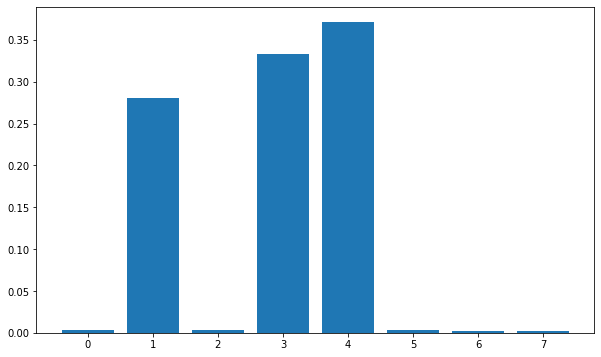

In [7]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_reg, y_reg)

importance = model.feature_importances_

for i,v in enumerate(importance):
	print("Feature: %0d, Score: %.5f" %(i,v))
 

plt.figure(figsize = (10,6))
plt.bar([x for x in range(len(importance))], importance)
plt.show()


**<ins>CART Classification Feature Importance</ins>**

Feature: 0, Score: 0.60818
Feature: 1, Score: 0.11111
Feature: 2, Score: 0.01324
Feature: 3, Score: 0.07567
Feature: 4, Score: 0.06883
Feature: 5, Score: 0.03305
Feature: 6, Score: 0.01530
Feature: 7, Score: 0.07464


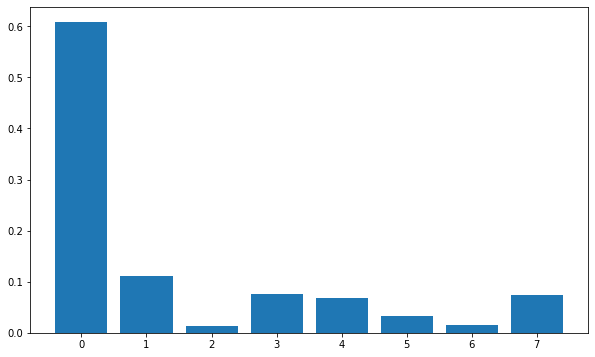

In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_clf, y_clf)
importance = model.feature_importances_

for i,v in enumerate(importance):
	print("Feature: %0d, Score: %.5f" %(i,v))
 

plt.figure(figsize = (10,6))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

<a id='section2.0.3'></a>
### Random Forest Feature Importance

Analogously, we can use the RandomForest algorithm for feature importance implemented in scikit-learn as the [*RandomForestRegressor*](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) and [*RandomForestClassifier*](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

As above, the model provides a *feature_importances_* property. 

**<ins>Random Forest Regression Feature Importance</ins>**

Feature: 0, Score: 0.00488
Feature: 1, Score: 0.27663
Feature: 2, Score: 0.00440
Feature: 3, Score: 0.33057
Feature: 4, Score: 0.36924
Feature: 5, Score: 0.00467
Feature: 6, Score: 0.00460
Feature: 7, Score: 0.00501


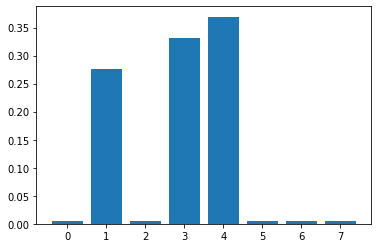

In [ ]:
from sklearn.ensemble import RandomForestRegressor

**<ins>Random Forest Classification Feature Importance</ins>**


Feature: 0, Score: 0.27838
Feature: 1, Score: 0.11923
Feature: 2, Score: 0.07076
Feature: 3, Score: 0.13927
Feature: 4, Score: 0.10233
Feature: 5, Score: 0.10529
Feature: 6, Score: 0.04857
Feature: 7, Score: 0.13616


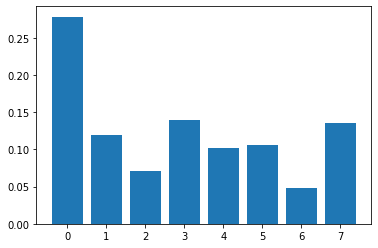

In [ ]:
from sklearn.ensemble import RandomForestClassifier

<a id='section2.0.4'></a>
### XGBoost Feature Importance
[XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) is a Python library that provides an efficient implementation of the stochastic gradient boostig algorithm. (For an introduction to Boosted Trees, you can take a look [here](https://xgboost.readthedocs.io/en/latest/tutorials/model.html))

This algorithm can be integrated with Scikit-Learn via the *XGBRegressor* and *XGBClassifier* classes. 

Even in this one, we can find the *feature_importances_* property. 

First, let's install the XGBoost library, with pip:

In [ ]:
!pip install xgboost

In [ ]:
import xgboost

Now, let's take a look at an example of XGBoost for feature importance. 

**<ins>XGBoost Regression Feature Importance</ins>**



In [ ]:
from xgboost import XGBRegressor

**<ins>XGBoost Classification Feature Importance</ins>**



In [ ]:
from xgboost import XGBClassifier

<a id='section2.0.5'></a>
### [Permutation Feature Importance](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

Permutation feature importance is a technique for calculating relative importance scores that is independent of the model used. 
It measures the increase in the prediction error of the model after we permuted the feature's values, which breaks the relationship between the feature and the true outcome.

The concept is really straightforward: We measure the importance of a feature by calculating the increase in the model's prediction error after permuting the feature. A feature is "important" if shuffling its values increases the model error, because in this case the model relied on the feature for the prediction. A feature is "unimportant" if shuffling its values leaves the model error unchanged, because in this case the model ignored the feature for the prediction. 

Permutation feature selection can be used via the [*permutation_importance()*](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html) function that take a fit model, a dataset and a scoring function. 

Let's try this approach with an algorithm that doesn't support feature selection natively, [KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) (K-Nearest Neighbors).

**<ins>Permutation Feature Importance for Regression</ins>**


Feature: 0, Score: 34.14988
Feature: 1, Score: 1910.23766
Feature: 2, Score: 23.94125
Feature: 3, Score: 2261.65767
Feature: 4, Score: 2582.54466
Feature: 5, Score: 49.68650
Feature: 6, Score: 56.45050
Feature: 7, Score: 34.02132


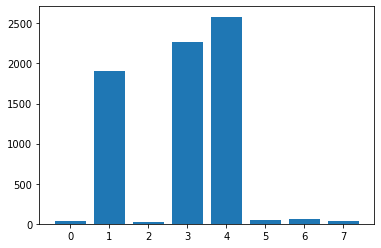

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt 

model = KNeighborsRegressor()

model.fit(X_reg, y_reg)

results = permutation_importance(model, X_reg, y_reg, scoring = "neg_mean_squared_error")

importance = results.importances_mean

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**<ins>Permutation Feature Importance for Classification</ins>**

Feature: 0, Score: 0.07680
Feature: 1, Score: 0.02580
Feature: 2, Score: 0.00700
Feature: 3, Score: 0.02840
Feature: 4, Score: 0.10560
Feature: 5, Score: 0.05520
Feature: 6, Score: 0.03460
Feature: 7, Score: 0.06340


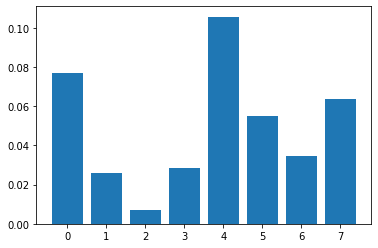

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_clf, y_clf)

results = permutation_importance(model, X_clf, y_clf, scoring = "accuracy")

importance = results.importances_mean

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**<ins>Feature Selection with Importance</ins>**

Feature importance scores can be used to find useful insights and interpret the data, but they can also be used directly to help rank and select features that are most useful. This procedure is usually referred as *Feature Selection*, and we'll look at it in more detail soon.

In our case, we can show how is possible to find redundant features by using the previously shown techniques. 

Firstly, we can split the dataset into train and test sets, train a model on the training set, make predictions on the test set and evaluate the results by employing classification accuracy. We'll use a Logistic Regression model to fit our data. 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size = 0.33, random_state = 1)

model = LogisticRegression(solver ="liblinear")
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print("Accuracy: %.2f" % (accuracy * 100))


Accuracy: 86.67


In this case, we can see that our model achieved a classification accuracy of about $86.67 \%$ using all the features in the dataset. 

Let's see what happens if we select only relevant features. We could use any of the feature importance scores above, but in this case we'll use the ones provided by random forest. 

We can use the [*SelectFromModel*](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html) class to define both the model abd the number of features to select. 

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

fs = SelectFromModel(RandomForestClassifier(n_estimators = 200), max_features = 5)

This will calculate the importance scores that can be used to rank all input features. We can then apply the method as a transform to select a subset of 5 most important features from the dataset. This transform will be applied to the training set and the test set. 

In [16]:
fs.fit(X_train, y_train)

X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

We can wrap up every piece and get this code snippet. 

In [18]:
def select_features(X_train, y_train, X_test):
	fs = SelectFromModel(RandomForestClassifier(n_estimators= 1000), max_features=5)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs 
  

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size = 0.33, random_state = 1)

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

model = LogisticRegression(solver = "liblinear")
model.fit(X_train_fs, y_train)

y_hat = model.predict(X_test_fs)

accuracy = accuracy_score(y_test, y_hat)
print("Accuracy : %.2f" % (accuracy*100))

Accuracy : 86.36


In this case, we can see that the model achieves the same performance on the dataset, although with almost half of the features.

---

<a id='section2.1'></a>
## **Feature Selection**

> Not all features are created equal

> *Zhe Chen*

There would always be some features which are less important with respect to a specific problem. Those irrelevant features need to be removed. 
*Feature selection* addresses these problems by automatically selecting a subset that are most useful to the problem. 

Most of the times the reduction in the number of input variables shrinks the computational cost of modeling, but sometimes it might happen that it also improves the performance of the model. 

Among the large amount of feature selection methods we'll focus mainly on statistical-based ones. They involve evaluating the relationship between each input variable and the target variable using statistics. These methods are usually fast and effective, the only issue is that statistical measures depends on the data type of both input and output variables. 

The classes in the ``sklearn.feature_selection`` module can be used for feature selection/dimensionality reduction on sample sets. 

<a id='section2.1.0'></a>
### [Removing Features with Low Variance](https://chrisalbon.com/machine_learning/feature_selection/variance_thresholding_for_feature_selection/)

Whenever you want to go for a simple approach, there's always a *threshold* involved. ``VarianceThreshold``is a simple baseline approach to select features. It removes all features whose variance doesn't reach a certain threshold. 




In [22]:
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold

iris = datasets.load_iris()

X = iris.data
y = iris.target

thresholder = VarianceThreshold(threshold = 0.6)
X_high_variance = thresholder.fit_transform(X)

X_high_variance[0:5]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4]])

In [23]:
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

<a id='section2.1.1'></a>
### Univariate Feature Selection
Univariate feature selection examines each feature individually to determine the strength of the relationship of the feature with the response variable. 

There are a few different options for univariate selection: 

* [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) removes all but the *k* highest scoring features; 
* [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile) removes all but a user-specified highest scoring percentage of features; 
* [SelectFpr](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFpr.html#sklearn.feature_selection.SelectFpr), [SelectFdr](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFdr.html#sklearn.feature_selection.SelectFdr), [SelectFwe](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFwe.html#sklearn.feature_selection.SelectFwe) are some common univariate statistical tests
* [GenericUnivariateSelect](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.GenericUnivariateSelect.html#sklearn.feature_selection.GenericUnivariateSelect) allows to select the best univariate selection strategy with hyper-parameter search. 

We can perform $\chi^2$ test to the samples to retrieve only the two best features:

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X,y = datasets.load_iris(return_X_y  = True)
print(X.shape)

X_new = SelectKBest(chi2, k = 2).fit_transform(X,y)
print(X_new.shape)

(150, 4)
(150, 2)


We have different scoring functions for regression and classification: 
* Regression: [f_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression), [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression)

* Classification: [chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2), [f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif), [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif)

<a id='section2.1.2'></a>
### Recursive Feature Elimination

Recursive Feature Elimination (RFE) as its name suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy. RFE is able to work out the combination of attributes that contribute to the prediction on the target variable. 

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.

In [28]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn import datasets

dataset = datasets.load_iris()

svm = LinearSVC()

rfe = RFE(svm, 1)
rfe = rfe.fit(dataset.data, dataset.target)

print(rfe.support_)
print(rfe.ranking_)


[False False False  True]
[4 2 3 1]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


---
<a id='section2.2'></a>
## **Feature Extraction (Bonus)**

> Feature extraction is very different from Feature selection: the former consists in transforming arbitrary data, such as text or images, into numerical features usable for machine learning. The latter is a machine learning technique applied on these features.

<a id='section2.2.1'></a>
### Loading Features from Dicts

The class [DictVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html#sklearn.feature_extraction.DictVectorizer) transforms lists of feature-value mappings to vectors. 

In particular, it turns lists of mappings (dict-like objects) of feature names to feature values into *Numpy* arrays or *scipy.sparse* matrices for use with scikit-learn estimators. 

While not particularly fast to process, Python’s dict has the advantages of being convenient to use, being sparse (absent features need not be stored) and storing feature names in addition to values.






In [ ]:
measurements = [
    {'city': 'Milano', 'temperature': 33.},
    {'city': 'Torino', 'temperature': 12.},
    {'city': 'Roma', 'temperature': 18.},
]

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
print(vec.fit_transform(measurements).toarray())
print(vec.get_feature_names())

DictVectorizer is also a useful representation transformation for training sequence classifiers in Natural Language Processing (NLP).

<a id='section2.2.2'></a>
### Feature Hashing
Named as one of the best hacks in Machine Learning, Feature Hashing is a fast and space-efficient way of vectorizing features, i.e. turning arbitrary features into indices in a vector or matrix. 

But what is Feature Hashing? In order to answer to this question we should firstly pose another question, what is out-of-core learning? 

Consider the problem of learning a linear model: an out-of-core algorithm learns the model without loading the whole data set in memory. This makes the algorithm very scalable, a very attractive property when dealing with a huge dataset that doesn't fit in memory. 

One possible implementation uses a mapping from a feature name (and possibly a value) to its corresponding coefficient. This is nothing but applying one-hot-encoding to a feature. While it looks great at first glance, it relies heavily on the way we implement the mapping from features to coefficients. This incongruence take us to hashing. 

Hashing usually relies on building a particular data structure, an [hash table](https://www.hackerearth.com/practice/data-structures/hash-tables/basics-of-hash-tables/tutorial/), in our case instances of [FeatureHasher](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.FeatureHasher.html#sklearn.feature_extraction.FeatureHasher) apply a hash function directly to the features to determine their column index in sample matrices. The result is increased speed and reduced memory usage, at the expense of *inspectability*; the hasher does not remember what the input features looked like and has no ``inverse_transform`` method.

There are some side effects though, in particular: hash functions can hash different keys to the same integer value, this is known as *collision*. Scikit-learn implements a signed hash function so that the sign of the hash value determines the sign of the value stored in the output matrix for a feature. This way, collisions are likely to cancel out rather than accumulate error, and the expected mean of any output feature’s value is zero (This mechanism is enabled by default with ``alternate_sign=True``)


In [ ]:
from sklearn.feature_extraction import FeatureHasher

# Creating array of dicts
data = [
    {'dog': -1, 'cat': 2, 'elephant': 4},
    {'dog': 2, 'run': 5, 'cat':-7}
]

h = FeatureHasher(n_features=4)
h.transform(data).toarray() 


<a id='section2.3'></a>
## **Feature Construction**
There's no strict recipe, it's 99% creativity. We're gonna take a look at some use cases in the next lecture though :)

You should take a look at the *Feature Extraction* part of this marvellous notebook from Beluga, one of the best *Competitions Grandmasters* on Kaggle. 
https://www.kaggle.com/gaborfodor/from-eda-to-the-top-lb-0-367

---
---

<a id='section3'></a>
# **Handling missing values**

"*Missingness*" is almost always informative by itself, but we should tell our algorithm if a value is missing. Even if we build a model to impute our values, we are not adding any real information. We’re just reinforcing the patterns already provided by other features.

Basically, there are three categories of missing data:

* **MCAR** (Missing Completely At Random) where the pattern of missinginess is statistically independent of the data record. Example: you have a data set on a piece of paper and you spill coffee on the paper destroying part of the data.

* **MAR** (Missing At Random) where the probability distribution of the pattern of missingness is functionally dependent upon the observable component in the record. MCAR is a special case of MAR. Example: if a child does not attend an educational assessment because the child is (genuinely) ill, this might be predictable from other data we have about the child’s health, but it would not be related to what we would have measured had the child not been ill. 

* **MNAR** (Missing Not at Random) which is defined as the case which is NOT MAR, or when the missingness is specifically related to what is missing. Example: a person does not attend a drug test because the person took drugs the night before.

Let's see a few strategies to impute missing values, i.e. to infer them from the known part of the data. 


<a id='section3.1'></a>
### **Univariate Feature Imputation**

We can rely on scikit-learn's [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) class, which provides a few strategies for imputing missing values, such as : imputing by a constant value, by using statistics (mean, median, etc). 

Let's see how we can replace missing values (``np.nan``) using the mean value of the columns that contain the missing values. 



In [30]:
import numpy as np 
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values = np.nan, strategy = "mean")

X_train = [[7, 23, 4], [5, np.nan, 8], [10, 5, 9]]
imp_mean.fit(X_train)

X_test = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(imp_mean.transform(X_test))

[[ 7.33333333  2.          3.        ]
 [ 4.         14.          6.        ]
 [10.         14.          9.        ]]


SimpleImputer can also be used in conjunction with *pandas* and in particular with data represented as strings or categoricals, by using ``most_frequent``or ``constant``strategy: 

In [32]:
import pandas as pd 

df = pd.DataFrame([["a", "x"], 
                   [np.nan, "y"], 
                   ["a", np.nan],
                   ["b", "y"]], dtype = "category")

imp = SimpleImputer(strategy = "most_frequent")
print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]



<a id='section3.2'></a>
### **Multivariate Feature Imputation**

Another approach is to use the [IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer) class, which models each feature with missing values as a function of other features. How does each iteration work? At each step, a feature column is designated as output ``y``and the other feature columns are treated as inputs ``X``. Then, the regressor is used to predict the missing values of ``y``. This is done for each feature in an iterative fashion. 



In [34]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter = 10, random_state = 1)
X_train = [[1,2],[3,6],[4,8],[np.nan,3], [7,np.nan]]
imp.fit(X_train)

X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]

print(np.round(imp.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


IterativeImputer is very flexible, it allows you to use a variety of estimators, if you want to further delve into this class take a look at [Imputing missing values with variants of IterativeImputer](https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#sphx-glr-auto-examples-impute-plot-iterative-imputer-variants-comparison-py)


<a id='section3.3'></a>
### **Nearest Neighbors Imputation**

The [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer) class offers imputation for filling in missing values using the k-Nearest Neighbors approach. By default it uses an euclidean distance metric that supports missing values, ``nan_euclidean_distances``. 





<img src="https://raw.githubusercontent.com/MLJCUnito/ProjectX2020/master/HowToTackleAMLCompetition/img/Lecture1/1.4.gif" width="600" height="450">


The following code snippet shows how to replace missing values using the mean feature value of the two nearest neighbors of samples with missing values:

In [35]:
from sklearn.impute import KNNImputer

X = [[1,2, np.nan], [3,4,6], [np.nan, 6, 5], [8, 8, 7]]

imputer = KNNImputer(n_neighbors = 2, weights = "uniform")

print(X)
print(imputer.fit_transform(X))

[[1, 2, nan], [3, 4, 6], [nan, 6, 5], [8, 8, 7]]
[[1.  2.  5.5]
 [3.  4.  6. ]
 [5.5 6.  5. ]
 [8.  8.  7. ]]



<a id='section4'></a>
# **References & Additional Material** 

**Preprocessing Data**
* [About Feature Scaling by Sebastian Raschka](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html)
* [Scikit-learn's Preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)

**Feature Selection**
* [Univariate](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py)

* [Feature Selection using SelectFromModel and LassoCV](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py) 

* [Tree-based feature importance 1](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py)

* [Tree-based feature importance 2](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py)


**Encoding Categorical Features**
* [One Hot Encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)

* [Feature Hasher vs DictVectorizer](https://scikit-learn.org/stable/auto_examples/text/plot_hashing_vs_dict_vectorizer.html)

**Feature Importance**

* [Calculate Feature Importance by Machinelearningmastery](https://machinelearningmastery.com/calculate-feature-importance-with-python/)

**Feature Selection**

* [Feature Selection, Wikipedia](https://en.wikipedia.org/wiki/Feature_selection)

* [Feature Selection 1, by Machinelearningmastery](https://machinelearningmastery.com/an-introduction-to-feature-selection/ )

* [Feature Selection 2, by Machinelearningmastery](https://machinelearningmastery.com/feature-selection-machine-learning-python/)

* [Feature Selection 3, by Machinelearningmastery](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

**Handling Missing Values**

* [Marking Imputed Values](https://scikit-learn.org/stable/modules/impute.html#marking-imputed-values)